# How do variations in the percentage of Black students enrolled across high schools affect the achievement gap in SAT Math scores when compared with other racial groups?

### To analyze how variations in the percentage of Black students enrolled across high schools affect the achievement gap in SAT Math scores when compared with other racial groups, we can focus on the 'Percent Black' and 'Average Score (SAT Math)' columns, and compare these with the percentages and scores of other racial groups.

### Here is the proposed approach:

- Strip percentage sign from all values in dataset.
- Analyze the relationship between the percentage of Black students and SAT Math scores.
- Compare this with the relationships for other racial groups (White, Hispanic, Asian).

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset and view first five rows

df = pd.read_csv("nyscores2_clean.csv")
df.head(5)

,index,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,...,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%
1,3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,...,2:45 PM,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%
2,4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,...,3:00 PM,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%
3,5,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,...,3:35 PM,416.0,1.7%,3.1%,5.5%,88.9%,613.0,453.0,463.0,95.9%
4,6,01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,Manhattan,NY,10002,40.71376,...,3:30 PM,255.0,3.9%,24.4%,56.6%,13.2%,410.0,406.0,381.0,59.7%


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        385 non-null    int64  
 1   School ID                    385 non-null    object 
 2   School Name                  385 non-null    object 
 3   Borough                      385 non-null    object 
 4   Building Code                385 non-null    object 
 5   Street Address               385 non-null    object 
 6   City                         385 non-null    object 
 7   State                        385 non-null    object 
 8   Zip Code                     385 non-null    int64  
 9   Latitude                     385 non-null    float64
 10  Longitude                    385 non-null    float64
 11  Phone Number                 385 non-null    object 
 12  Start Time                   385 non-null    object 
 13  End Time            

### Strip percentage sign from all values in dataset.

In [5]:
# Define the percentage columns to be processed
percentage_columns = ['Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian', 'Percent Tested']

# Loop through the percentage columns and process them if they exist in the DataFrame
for col in percentage_columns:
    if col in df:
        df[percentage_columns] = df[percentage_columns].replace({'%': ''}, regex=True)

# View the data after conversion
df.head(5)

,index,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,...,4:00 PM,1735.0,28.6,13.3,18.0,38.5,657.0,601.0,601.0,91.0
1,3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,...,2:45 PM,358.0,11.7,38.5,41.3,5.9,395.0,411.0,387.0,78.9
2,4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,...,3:00 PM,383.0,3.1,28.2,56.9,8.6,418.0,428.0,415.0,65.1
3,5,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,...,3:35 PM,416.0,1.7,3.1,5.5,88.9,613.0,453.0,463.0,95.9
4,6,01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,Manhattan,NY,10002,40.71376,...,3:30 PM,255.0,3.9,24.4,56.6,13.2,410.0,406.0,381.0,59.7


### Analyze the relationship between the percentage of Black students and SAT Math scores.

- Correlation Analysis: Determine the correlation between the percentage of Black students and SAT Math scores, and similarly for other racial groups. This will give us an initial understanding of the relationship between student racial composition and math scores.

- Detailed Analysis: Investigate further by visualizing these relationships and performing more in-depth statistical analysis if necessary.

In [7]:
# Calculate correlation between the percentage of each racial group and SAT Math scores
correlation_data = df[['Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian', 'Average Score (SAT Math)']].corr()

# Extracting correlation with SAT Math scores
correlation_with_sat_math = correlation_data['Average Score (SAT Math)'].drop('Average Score (SAT Math)')
correlation_with_sat_math

Percent White       0.596357
Percent Black      -0.370823
Percent Hispanic   -0.372866
Percent Asian       0.712811
Name: Average Score (SAT Math), dtype: float64

### These correlations suggest that: A higher percentage of White and Asian students in a school is associated with higher SAT Math scores. Conversely, a higher percentage of Black and Hispanic students is associated with lower SAT Math scores.

### Compare this with the relationships for other racial groups (White, Hispanic, Asian).

To better understand these relationships and explore the potential factors behind the achievement gap in SAT Math scores, we can visualize these correlations. Let's create scatter plots for each racial group's percentage versus SAT Math scores, along with a line of best fit to illustrate the trends.

In [11]:
df[['Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian', 'Average Score (SAT Math)']].dtypes

Percent White                object
Percent Black                object
Percent Hispanic             object
Percent Asian                object
Average Score (SAT Math)    float64
dtype: object

In [12]:
# Convert percentage columns to numeric format
percentage_columns = ['Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian']
for col in percentage_columns:
    df[col] = df[col].astype('float')

# Check the data types again to confirm the conversion
print(df[percentage_columns].dtypes)

# Now you can proceed with the scatter plots as previously

Percent White       float64
Percent Black       float64
Percent Hispanic    float64
Percent Asian       float64
dtype: object


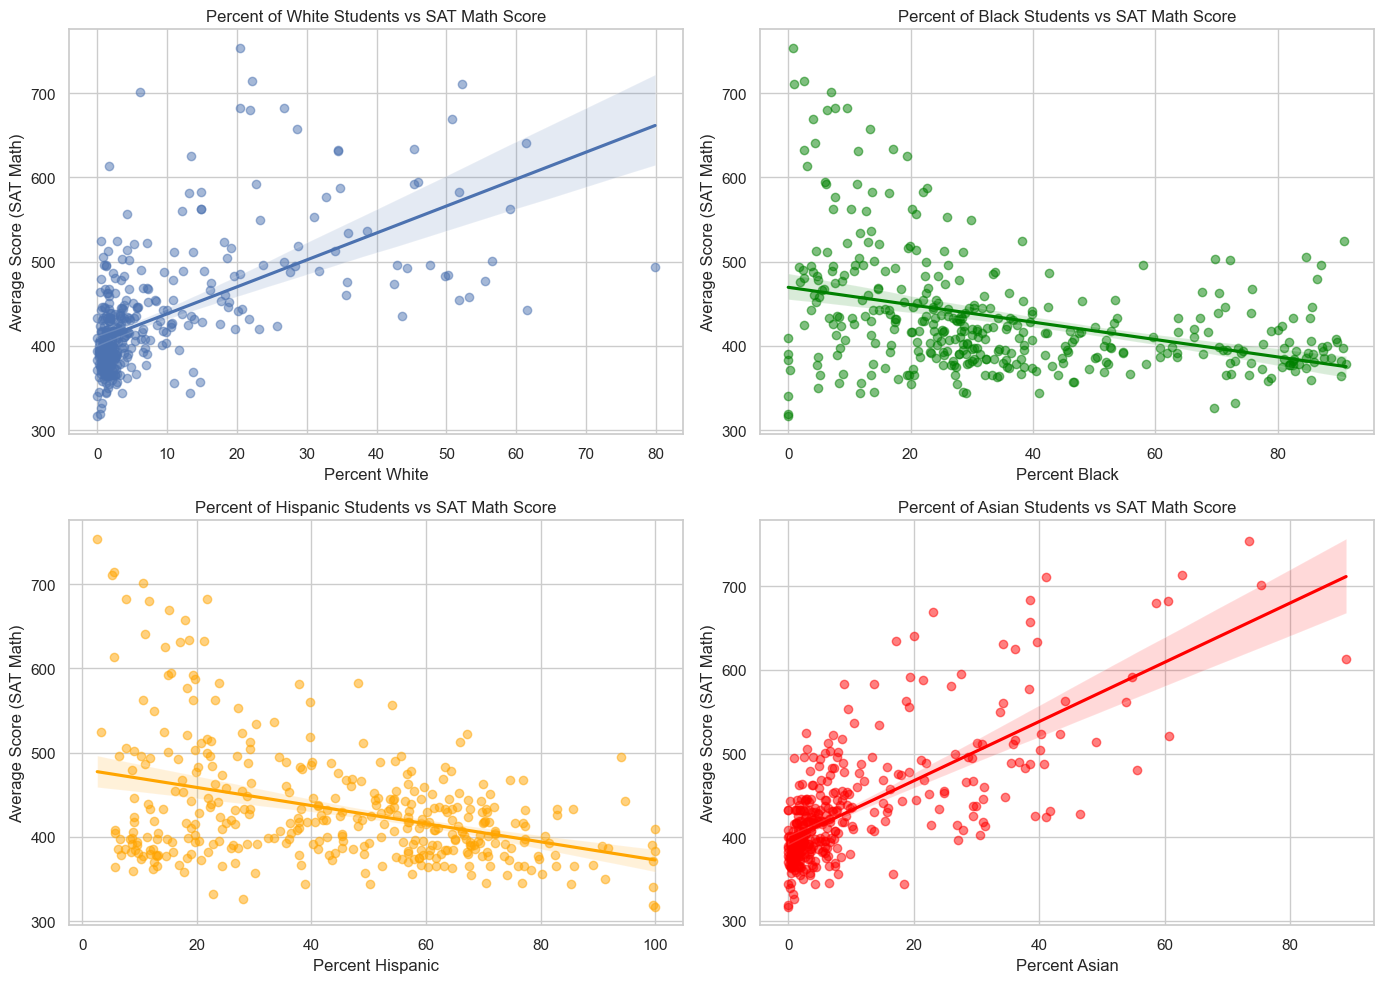

In [14]:
# Setting plot style
sns.set(style="whitegrid")

# Creating scatter plots for each racial group vs SAT Math scores
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot for Percent White
sns.regplot(ax=axes[0, 0], x='Percent White', y='Average Score (SAT Math)', data=df, scatter_kws={'alpha':0.5})
axes[0, 0].set_title('Percent of White Students vs SAT Math Score')

# Plot for Percent Black
sns.regplot(ax=axes[0, 1], x='Percent Black', y='Average Score (SAT Math)', data=df, scatter_kws={'alpha':0.5}, color='green')
axes[0, 1].set_title('Percent of Black Students vs SAT Math Score')

# Plot for Percent Hispanic
sns.regplot(ax=axes[1, 0], x='Percent Hispanic', y='Average Score (SAT Math)', data=df, scatter_kws={'alpha':0.5}, color='orange')
axes[1, 0].set_title('Percent of Hispanic Students vs SAT Math Score')

# Plot for Percent Asian
sns.regplot(ax=axes[1, 1], x='Percent Asian', y='Average Score (SAT Math)', data=df, scatter_kws={'alpha':0.5}, color='red')
axes[1, 1].set_title('Percent of Asian Students vs SAT Math Score')

plt.tight_layout()
plt.show()


The scatter plots with regression lines illustrate the relationships between the percentages of different racial groups in NY high schools and the average SAT Math scores:

- Percent of White Students vs SAT Math Score: Shows a positive trend, indicating that schools with a higher percentage of White students tend to have higher SAT Math scores.
- Percent of Black Students vs SAT Math Score: Demonstrates a negative trend, suggesting that schools with a higher percentage of Black students tend to have lower SAT Math scores.
- Percent of Hispanic Students vs SAT Math Score: Similar to the trend with Black students, a higher percentage of Hispanic students is associated with lower SAT Math scores.
- Percent of Asian Students vs SAT Math Score: Exhibits a strong positive trend, with schools having a higher percentage of Asian students tending to achieve higher SAT Math scores.

<strong> These trends highlight the achievement gap in SAT Math scores across different racial groups, with particularly notable disparities for Black and Hispanic students compared to White and Asian students. </strong>

It's important to note that correlation does not imply causation. The reasons behind these disparities are likely complex and multifaceted, potentially involving factors such as socioeconomic status, access to resources, quality of education, and other societal issues. Further investigation beyond this analysis would be required to understand the underlying causes of these trends. 